In [37]:
import numpy as np
import matplotlib.pyplot as plt

A Reduced 3 Body system is one in which the mass of the 3rd body is negligible compared to the other 2. That results in the trajectories of the massive bodies to not be affected severely and make calculations easier.

In [38]:
# Constants
G = 6.67430e-11  # gravitational constant
m_1 = 5.972e24  # mass of the first body
m_2 = 5.972e24  # mass of the second body
m_3 = 500  # mass of the third body

In [39]:
# Creating COM centred frame
u = m_2/(m_1+m_2)
(x_1,y_1) = (-u,0)
(x_2,y_2) = (1-u,0)

print(x_2)

0.5


In [64]:
# Grid points for x and y coordinates
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

In [65]:
def gravitational_potential_energy(x, y, m1, m2, m3):
    r1 = np.sqrt((x - x_1)**2 + (y - y_1)**2)
    r2 = np.sqrt((x - x_2)**2 + (y - y_2)**2)
    mask = (r1 > 0.1) & (r2 > 0.1)  # Remove points closer than 0.1 units from m1 and m2
    Energy = -G * (m1 * m3 / r1 + m2 * m3 / r2)
    Energy[~mask] = np.nan 
    return Energy

In [66]:
# Assign potential to every point 
Z = gravitational_potential_energy(X, Y, m_1, m_2, m_3)

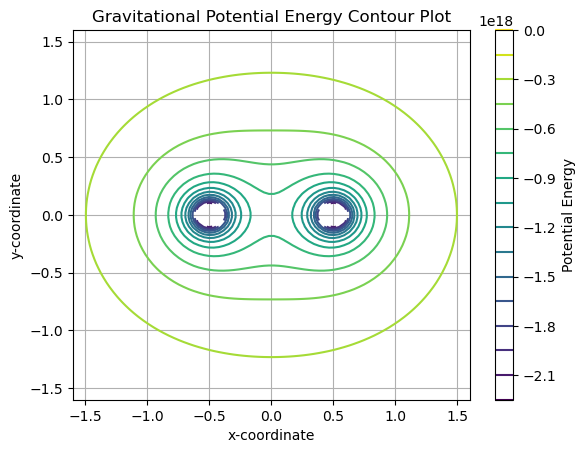

In [68]:
# Create contour plot
plt.contour(X, Y, Z, 15)
plt.title("Gravitational Potential Energy Contour Plot")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.colorbar(label="Potential Energy")
plt.xlim(-1.6,1.6)
plt.ylim(-1.6,1.6)
plt.grid(True)
plt.show()